# Chapter 3

## Import Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


## Split Train and Test Sets

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y: ', np.bincount(y))
print('Labels counts in y_train: ', np.bincount(y_train))
print('Labels counts in y_test: ', np.bincount(y_test))

Labels counts in y:  [50 50 50]
Labels counts in y_train:  [35 35 35]
Labels counts in y_test:  [15 15 15]


## Preprocess Data

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Train the Classifier -- For Now, Perceptron

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %d" % (y_test != y_pred).sum())

Misclassified samples: 3


## Evaluate the Classifier

In [6]:
from sklearn.metrics import accuracy_score
print('Accuracy %.2f' % accuracy_score(y_test, y_pred))

# Can also use classifier built-ins to do this
print('Accuracy %.2f' % ppn.score(X_test_std, y_test))

Accuracy 0.93
Accuracy 0.93


## Plot the Decision Regions
Notice here how the plot shows that the Perceptron is unable to correctly classify all instances because the dataset itself is not linearly separable.

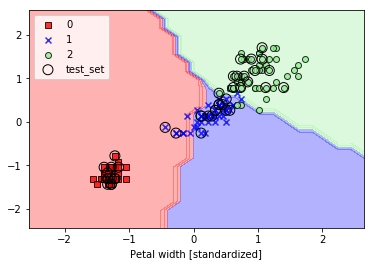

In [8]:
from util import plot_decision_regions
import matplotlib.pyplot as plt

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.xlabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.show()